In [1]:
# display information about NVIDIA GPU (Graphics Processing Unit) devices installed on a system.
!nvidia-smi

Sat Mar 16 12:20:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.28                 Driver Version: 546.28       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   57C    P8               5W /  75W |    389MiB /  4096MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# get the current working directory
import os
HOME = os.getcwd()
print(HOME)

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot


In [3]:
print("hai")

hai


## Install Grounding DINO 🦕 

In [3]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot
C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\GroundingDINO


Cloning into 'GroundingDINO'...


In [5]:
# define the configuration path for accesing the GroundingDINO_SwinT_OGC.py 
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [9]:
# %cd {HOME}
# !mkdir {HOME}/weights
# %cd {HOME}/weights

# !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth


%cd {HOME}
!mkdir weights

folder_path = HOME+"\\weights"
print(folder_path)

%cd {folder_path}

# for windows
!curl -o groundingdino_swint_ogc.pth -L https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth 

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot
C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\weights
C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\weights


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  661M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0  661M    0 5568k    0     0  2542k      0  0:04:26  0:00:02  0:04:24 7453k
  2  661M    2 14.2M    0     0  4587k      0  0:02:27  0:00:03  0:02:24 8375k
  3  661M    3 23.1M    0     0  5658k      0  0:01:59  0:00:04  0:01:55 8628k
  4  661M    4 30.3M    0     0  5990k      0  0:01:53  0:00:05  0:01:48 8296k
  6  661M    6 40.5M    0     0  6705k      0  0:01:41  0:00:06  0:01:35 8741k
  7  661M    7 50.8M    0     0  7241k      0  0:01:33  0:00:07  0:01:26 9299k
  8  661M    8 57.7M    0     0  7221k      0  0:0

In [9]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\weights\groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

In [11]:
%cd {HOME}
!mkdir Data

folder_path = HOME+"\\Data"
print(folder_path)

%cd {folder_path}

# !wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
# !wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
# !wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
# !wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

!curl -o dog.jpeg -L https://media.roboflow.com/notebooks/examples/dog.jpeg
!curl -o dog-2.jpeg -L https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!curl -o dog-3.jpeg -L https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!curl -o dog-4.jpeg -L https://media.roboflow.com/notebooks/examples/dog-4.jpeg 

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot
C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\Data
C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\Data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  103k  100  103k    0     0   261k      0 --:--:-- --:--:-- --:--:--  262k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  221k  100  221k    0     0   225k      0 --:--:-- --:--:-- --:--:--  225k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:

## Load Grounding DINO Model

In [10]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

C:\Users\AKHIL JX\Music\Akhil ML Project\zero shot\GroundingDINO


C:\personal files\Installation\anaconda\envs\object_detection\Lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


## Grounding DINO Demo

C:\personal files\Installation\anaconda\envs\object_detection\Lib\site-packages\transformers\modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
C:\personal files\Installation\anaconda\envs\object_detection\Lib\site-packages\torch\utils\checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
C:\personal files\Installation\anaconda\envs\object_detection\Lib\site-packages\torch\utils\checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


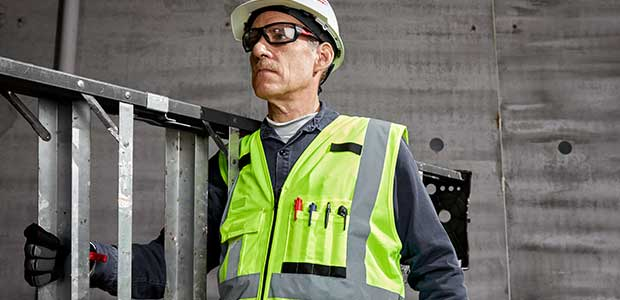

In [11]:
import os
import supervision as sv
from IPython.display import Image

IMAGE_NAME = "pp.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "helmet and vest"
BOX_TRESHOLD = 0.45
TEXT_TRESHOLD = 0.25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline  

# Display the original image
Image(filename=IMAGE_PATH)



In [13]:
# saving the annotated image (output) locally
import matplotlib.pyplot as plt

# Assuming 'image' is your ndarray image
# plt.imshow(annotated_frame)
plt.savefig('annotated_image.png')
# plt.show()

<Figure size 640x480 with 0 Axes>

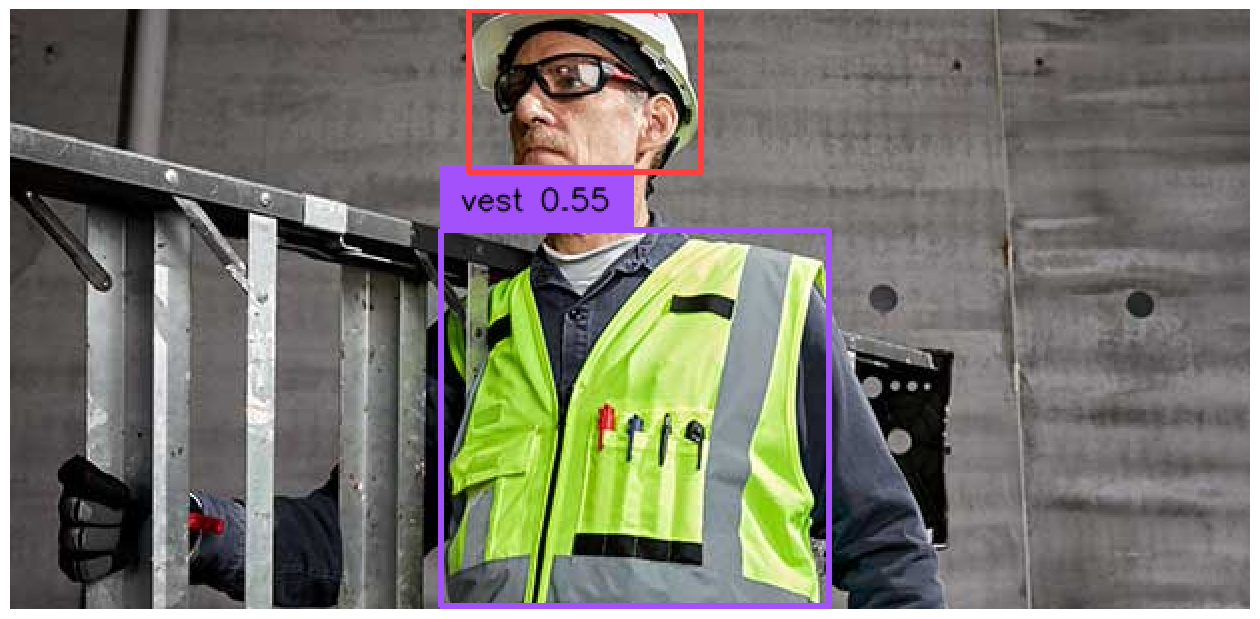

In [14]:
# output
sv.plot_image(annotated_frame, (16, 16))

In [10]:
# test the dino model on a series of images and save the output
import os
import supervision as sv
import cv2


# Path to the folder containing the images
folder_path = os.path.join(HOME, "data", "output_4")
output_folder = os.path.join(HOME, "data", "output")
# print(folder_path)

# List all files in the folder
files = os.listdir(folder_path)


# Filter out only the image files (assuming images have extensions like '.jpg', '.png', etc.)
image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# print(image_files)
# Read each image using OpenCV
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    TEXT_PROMPT = "helmet and vest"
    BOX_TRESHOLD = 0.25
    TEXT_TRESHOLD = 0.25

    image_source, image = load_image(image_path)

    boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
    )

    annotated_frames = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

    output_path = os.path.join(output_folder, f"annotated_{image_file}")  # Adjust output folder as needed
    cv2.imwrite(output_path, annotated_frames)
    

In [23]:
# test the dino model on sample video

import os
import cv2
import numpy as np
import torch
import supervision as sv
from IPython.display import Image

VIDEO_NAME = "video.mp4"
VIDEO_PATH = os.path.join(HOME, "data", VIDEO_NAME)
OUTPUT_VIDEO_NAME = "annotated_video.mp4"
OUTPUT_VIDEO_PATH = os.path.join(HOME, "data", OUTPUT_VIDEO_NAME)

TEXT_PROMPT = "helmet on the right person"
BOX_THRESHOLD = 0.35
TEXT_THRESHOLD = 0.25

# Open the video file
video_capture = cv2.VideoCapture(VIDEO_PATH)

# Get the frame rate of the video
fps = video_capture.get(cv2.CAP_PROP_FPS)

# Get the frame width and height
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, fps, (frame_width, frame_height))

# Initialize a variable to keep track of the current frame number
current_frame = 0

# Loop through each frame of the video
while True:
    # Read the next frame
    ret, frame = video_capture.read()
    
    # Check if the frame was successfully read
    if not ret:
        break
    
    # Convert the frame to a PyTorch tensor and move it to the desired device
    image_tensor = torch.from_numpy(frame).permute(2, 0, 1).float()  # Assuming 'device' is defined elsewhere
    
    # Process the frame (similar to processing a single image)
    boxes, logits, phrases = predict(
        model=model, 
        image=image_tensor, 
        caption=TEXT_PROMPT, 
        box_threshold=BOX_THRESHOLD, 
        text_threshold=TEXT_THRESHOLD
    )
    
    annotated_frame = annotate(image_source=frame, boxes=boxes, logits=logits, phrases=phrases)
    
    # Write the annotated frame to the output video
    output_video.write(annotated_frame)
    
    # Increment the current frame number
    current_frame += 1
    
    # # Check for key press to exit the loop (e.g., press 'q' to quit)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Release the video capture object, release the output video, and close any open windows
video_capture.release()
output_video.release()
# cv2.destroyAllWindows()
